# <center> Spam-Comments-Detection-With-ML

#### Importing the required libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

### Impoting the dataset

In [5]:
data = pd.read_csv("Youtube01-Psy.csv")

#### Let's see how the dataset looks like.

In [6]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
print(data.sample(5))

                              COMMENT_ID          AUTHOR                 DATE  \
46     z121znjjloycwtjf2233dfo5esfggn3lj        crestpee  2014-01-20T13:03:12   
8    z13ttt1jcraqexk2o234ghbgzxymz1zzi04            Cony  2013-11-28T16:01:47   
9    z12avveb4xqiirsix04chxviiljryduwxg0     BeBe Burkey  2013-11-28T16:30:13   
125    z124i3ygclj0xn4ly22jzb5a2ubvtbev1  Abdinasir Omar  2014-11-05T15:28:28   
77   z123e1gg3zyuf30ox04cdtbzgmaby3ehjc0     Lucas Trigo  2014-11-02T15:52:22   

                                               CONTENT  CLASS  
46   now its 1,884,034,783 views! pls. comment the ...      0  
8      You should check my channel for Funny VIDEOS!!﻿      1  
9    and u should.d check my channel and tell me wh...      1  
125                                Great music anyway﻿      0  
77   WHATS UP EVERYONE!? :-) I Trying To Showcase M...      1  


#### For the task of spam comments detection, we will only need the content and class columns.
#### So, let's subset the dataset  to these two columns only.

In [9]:
data = data[['CONTENT', 'CLASS']]
print(data.sample(5))

                                               CONTENT  CLASS
46   now its 1,884,034,783 views! pls. comment the ...      0
123                          2,124923004 wiews... wow﻿      0
71   plz check out fablife / welcome to fablife for...      1
149                Check me out I'm all about gaming ﻿      1
163                         I found out this song now﻿      0


#### The dataset class column contains 0 and 1 where 1 indicates a spam comment and 0 indicates a non spam comment.

### Now let's explore the dataset

In [17]:
len(list(data.index)) # dataset of length 350

350

In [10]:
data.isnull().sum() #No null values

CONTENT    0
CLASS      0
dtype: int64

In [21]:
data['CLASS'].value_counts() # A Balanced dataset ( 1:175, 0:175)

1    175
0    175
Name: CLASS, dtype: int64

### Training a classification Model
#### For this classification task, we will use the Bernoulli Naive Bayes algorithm

In [23]:
x = np.array(data['CONTENT'])
y = np.array(data['CLASS'])


cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain,xtest, ytrain, ytest = train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [24]:
model = BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

## Now, let's evaluate the trained model

In [25]:
print(model.score(xtest, ytest))

0.9857142857142858


#### Displaying the Confusion Matrix

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay # draws a confusion matrix

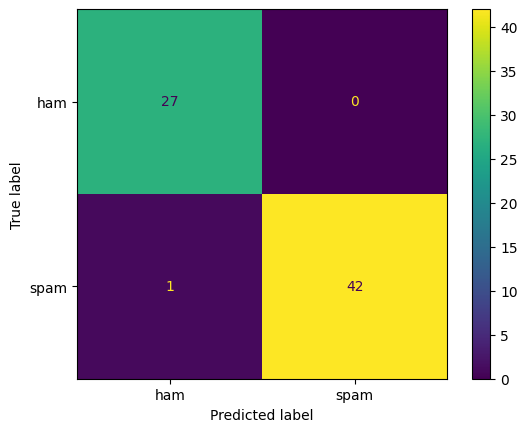

In [28]:
ConfusionMatrixDisplay.from_estimator(model, 
                      xtest, 
                      ytest, 
                      display_labels=["ham", "spam"])

#### Displaying the ROC curve

In [29]:
from sklearn.metrics import roc_curve, auc # Draw ROC Curve and compute AUC (Area Under Curve)
from matplotlib import pyplot as plt

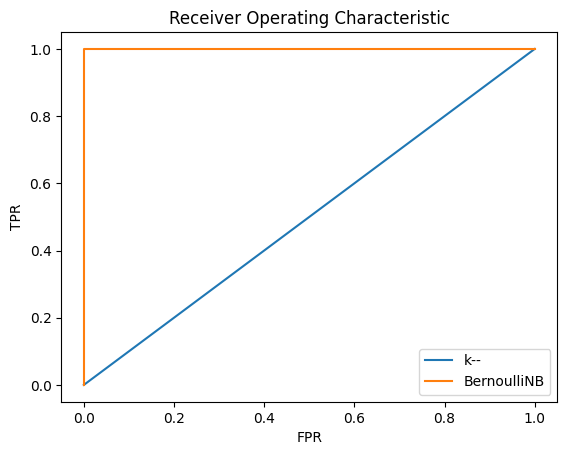

Area under Roc Curve for BernoulliNB:  1.000


In [30]:
fpr , tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:, 1], pos_label=1)

plt.plot([0,1],[0,1], label='k--')
plt.plot(fpr, tpr, label= "BernoulliNB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

print("Area under Roc Curve for BernoulliNB: ", "%.3f" % auc(fpr, tpr))